

This notebook provides a starting point for training fully connected NNs.

It shows how to use a dataset from tensorflow and display some images.

Builds several fully connected networks exploring both in depth and width of the network-

## Refs

[1] https://www.tensorflow.org/install

[2] https://www.tensorflow.org/tutorials/keras/classification


In [32]:
import tensorflow as tf 
import matplotlib.pyplot as plt
import numpy as np

Auxiliary functions to show plots of training history and display images

In [33]:
def show_history(history):
    print(history.history.keys())

    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.show()


def show_images(rows, cols, images, labels):

    width= 2 * rows
    height= 2 * cols

    f, axes= plt.subplots(rows,cols,figsize=(height,width))
    fig=plt.figure()

    for a in range(rows*cols):
        subplot_title=("class "+str(labels[a]))
        axes.ravel()[a].set_title(subplot_title)  
        axes.ravel()[a].imshow(images[a, :, :], cmap=plt.cm.binary)
        axes.ravel()[a].axis('off')
    fig.tight_layout()    
    plt.show() 
    
def show_histories():

    # summarize history for accuracy
    plt.plot(history1.history['accuracy'])
    plt.plot(history2.history['accuracy'])
    plt.plot(history3.history['accuracy'])
    plt.plot(history4.history['accuracy'])

    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['model 1', 'model 2', 'model 3', 'model 4'], loc='lower right')
    plt.show()


def show_accuracies(): 
    fig, ax = plt.subplots()
    X = np.arange(4)

    models = ['model 1', 'model 2', 'model 3', 'model 4']
    plt.bar(X, eval, width = 0.4, color = 'b', label='eval')
    plt.bar(X + 0.4, train, color = 'r', width = 0.4, label = "train")
    plt.xticks(X + 0.4 / 2, models)
    plt.ylim(top = 1.0, bottom = 0.95)
    plt.legend(loc='lower right')
    plt.show()
    
def show_misclassified(predictions, ground_truth, num_rows= 5, num_cols=3):
    
    # Plot the first X test images with wrong predictions.
    num_images = num_rows*num_cols
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))
    i = 0
    k = 0
    while i < num_images:
        predicted_label = np.argmax(predictions[k])
        if predicted_label != y_test[k]:
            plt.subplot(num_rows, 2*num_cols, 2*i+1)
            plot_image(k, predictions[k], ground_truth, x_test)
            plt.subplot(num_rows, 2*num_cols, 2*i+2)
            plot_value_array(k, predictions[k], ground_truth)
            i += 1
        k += 1
    plt.tight_layout()
    plt.show()

class_names = np.array(['0','1', '2', '3', '4', '5', '6', '7', '8', '9'])

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')    

def plot_predictions(predictions, ground_truth, num_rows= 5, num_cols=3 ):

    num_images = num_rows*num_cols
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions[i], ground_truth, x_test)
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions[i], ground_truth)
    plt.tight_layout()
    plt.show()

## Load Dataset from Tensorflow

In [34]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

eval = []
train = []

(60000, 28, 28)
(60000,)
(10000, 28, 28)


## Display images

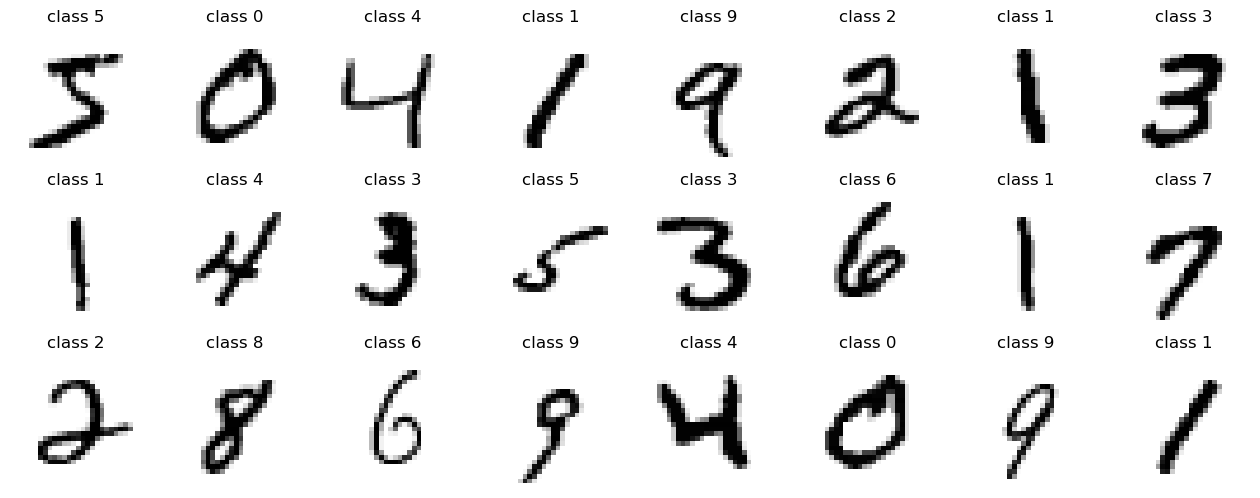

<Figure size 640x480 with 0 Axes>

In [35]:
show_images(3, 8, x_train, y_train)

# Create model 1

Single hidden layer with 64 units

In [36]:
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

## Display model information

In [37]:
print(model1.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________
None


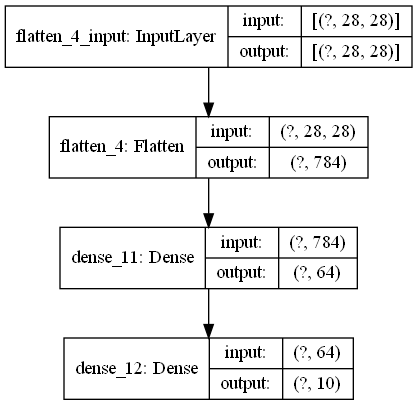

In [38]:
tf.keras.utils.plot_model(model1, 'multi_input_and_output_model.png', show_shapes=True)

## Specify the optimizer, loss and metrics

* **optimizer:** gradient descent optimization algorithm
* **loss:** loss function upon which derivatives are computed
* **metrics:** metrics to be computed during training and evaluation

In [39]:
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Training

In [40]:
history1 = model1.fit(x_train, y_train, batch_size=32, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3046 - accuracy: 0.9139
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1509 - accuracy: 0.9564
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1101 - accuracy: 0.9666
Epoch 4/20
1875/1875 [==============================] - 1s 678us/step - loss: 0.0863 - accuracy: 0.9744
Epoch 5/20
1875/1875 [==============================] - 1s 701us/step - loss: 0.0710 - accuracy: 0.9784
Epoch 6/20
1875/1875 [==============================] - 2s 861us/step - loss: 0.0580 - accuracy: 0.9825
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0497 - accuracy: 0.9850
Epoch 8/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0415 - accuracy: 0.9873
Epoch 9/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0361 - accuracy: 0.9886
Epoch 10/20
1875/1875 [==============================] - 2s 882us/step - los

## History graphs for accuracy and loss

dict_keys(['loss', 'accuracy'])


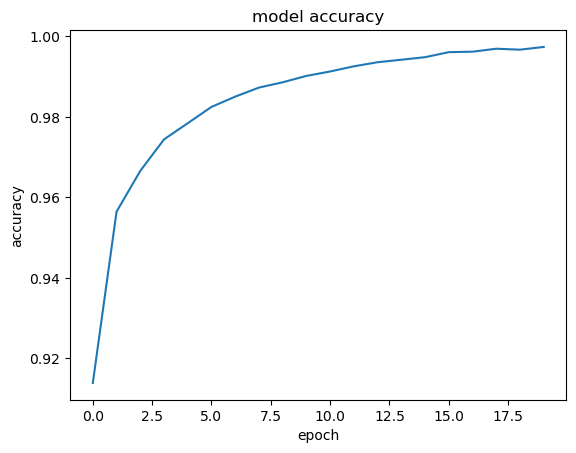

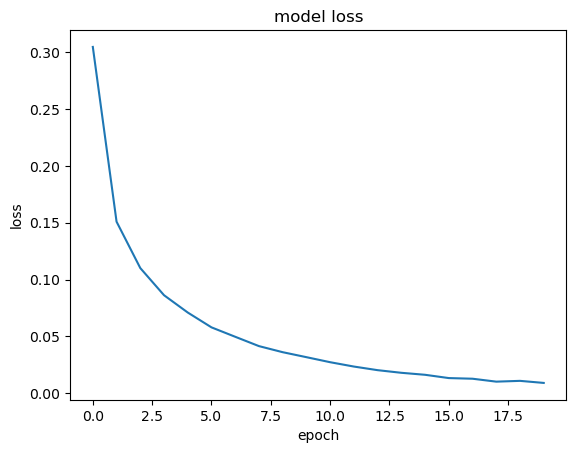

In [41]:
show_history(history1)

## Evaluate the model on the test set

In [42]:
eval.append(model1.evaluate(x_test, y_test, verbose=2)[1])

train.append(history1.history['accuracy'][19])

313/313 - 0s - loss: 0.1017 - accuracy: 0.9756


# Create model 2

Wider model, doubling the number of units in the hidden layer.

In [43]:
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Display model information

In [44]:
print(model2.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


## Training

In [45]:
history2 = model2.fit(x_train, y_train, batch_size=32, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2588 - accuracy: 0.9257
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1119 - accuracy: 0.9666
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0768 - accuracy: 0.9765
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0577 - accuracy: 0.9824
Epoch 5/20
1875/1875 [==============================] - 2s 874us/step - loss: 0.0452 - accuracy: 0.9858
Epoch 6/20
1875/1875 [==============================] - 1s 628us/step - loss: 0.0361 - accuracy: 0.9889
Epoch 7/20
1875/1875 [==============================] - 2s 812us/step - loss: 0.0283 - accuracy: 0.9908
Epoch 8/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0240 - accuracy: 0.9926
Epoch 9/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0193 - accuracy: 0.9941
Epoch 10/20
1875/1875 [==============================] - 1s 719us/step - los

## History graphs for accuracy and loss

dict_keys(['loss', 'accuracy'])


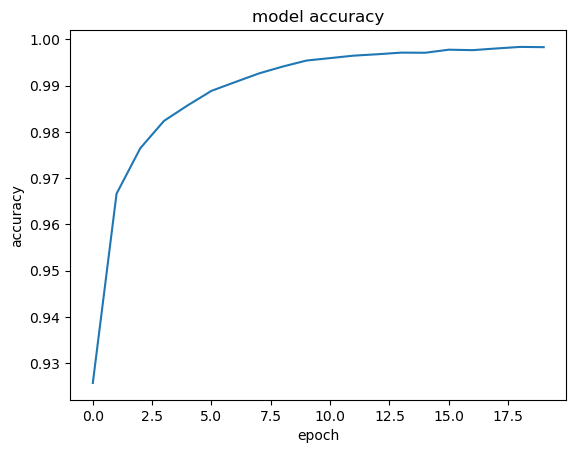

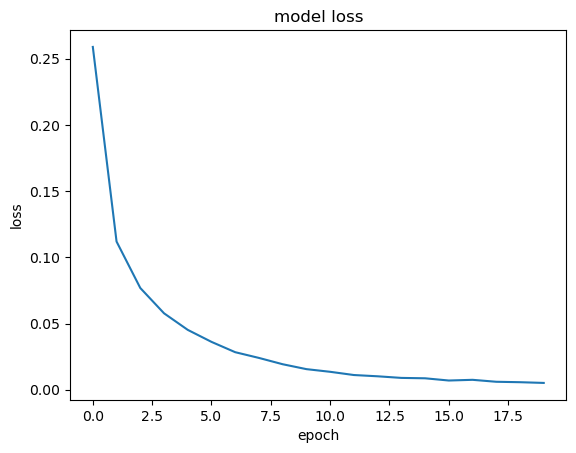

In [46]:
show_history(history2)

## Evaluate the model on the test set

In [47]:
eval.append(model2.evaluate(x_test,  y_test, verbose=2)[1])

train.append(history2.history['accuracy'][19])


313/313 - 0s - loss: 0.1091 - accuracy: 0.9776


# Create model 3

Adding a second hidden layer

In [48]:
model3 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Display model information

In [49]:
print(model3.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_16 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
None


## Training

In [50]:
history3 = model3.fit(x_train, y_train, batch_size=32, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2342 - accuracy: 0.9306
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1001 - accuracy: 0.9699
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0713 - accuracy: 0.9773
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0522 - accuracy: 0.9829
Epoch 5/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0415 - accuracy: 0.9864
Epoch 6/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0347 - accuracy: 0.9886
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0280 - accuracy: 0.9908
Epoch 8/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0245 - accuracy: 0.9918
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0215 - accuracy: 0.9929
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.019

## History graphs for accuracy and loss

dict_keys(['loss', 'accuracy'])


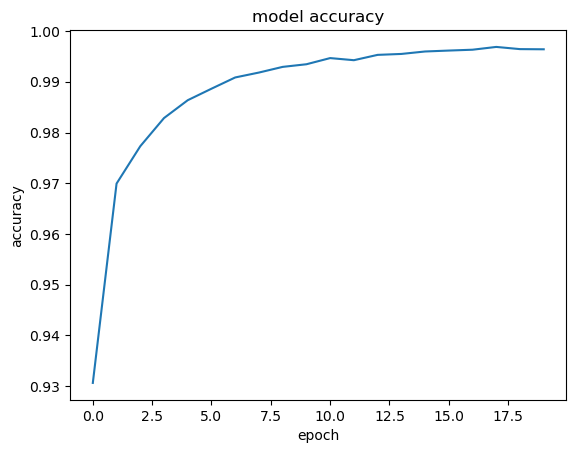

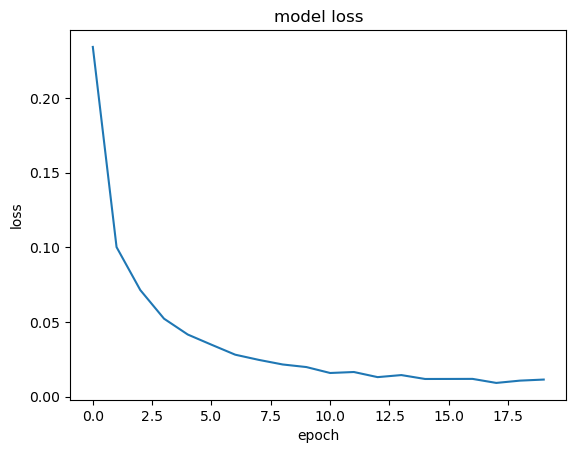

In [51]:
show_history(history3)

## Evaluate the model on the test set

In [52]:
eval.append(model3.evaluate(x_test,  y_test, verbose=2)[1])

train.append(history3.history['accuracy'][19])

313/313 - 0s - loss: 0.1146 - accuracy: 0.9799


# Create model 4

Adding a third hidden layer

In [53]:
model4 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Display model information

In [54]:
print(model4.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_19 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_20 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_21 (Dense)             (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________
None


## Training

In [55]:
history4 = model4.fit(x_train, y_train, batch_size=32, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2297 - accuracy: 0.9306
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0994 - accuracy: 0.9704
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0722 - accuracy: 0.9772
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0566 - accuracy: 0.9822
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0473 - accuracy: 0.9850
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0374 - accuracy: 0.9876
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0339 - accuracy: 0.9890
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0286 - accuracy: 0.9908
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0244 - accuracy: 0.9923
Epoch 10/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.022

## History graphs for accuracy and loss

dict_keys(['loss', 'accuracy'])


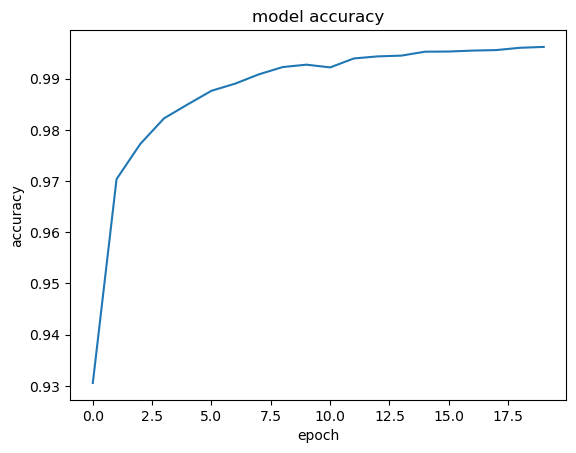

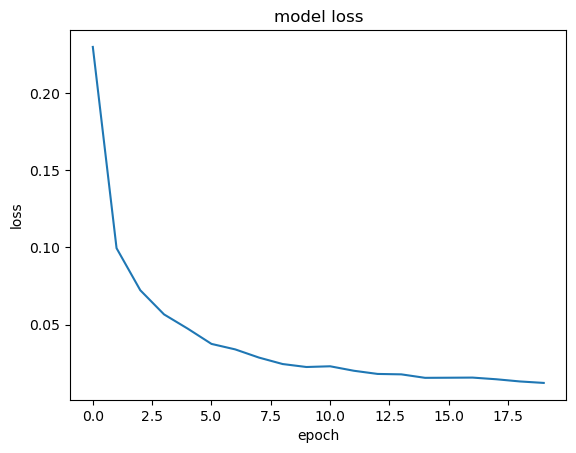

In [56]:
show_history(history4)

## Evaluate the model on the test set

In [57]:
eval.append(model4.evaluate(x_test,  y_test, verbose=2)[1])

train.append(history4.history['accuracy'][19])

313/313 - 0s - loss: 0.1262 - accuracy: 0.9803


## Evaluate the model on the test set

In [58]:
predictions = model4.predict(x_test)
predicted_lable = np.argmax(predictions[0])

print(predictions[0])
print(predicted_lable)


[1.2716354e-21 3.1396812e-11 6.2561996e-14 2.2690480e-12 1.3420365e-10
 1.8991699e-18 1.9205249e-24 1.0000000e+00 1.2111656e-12 4.3890624e-09]
7


## Some prediction samples

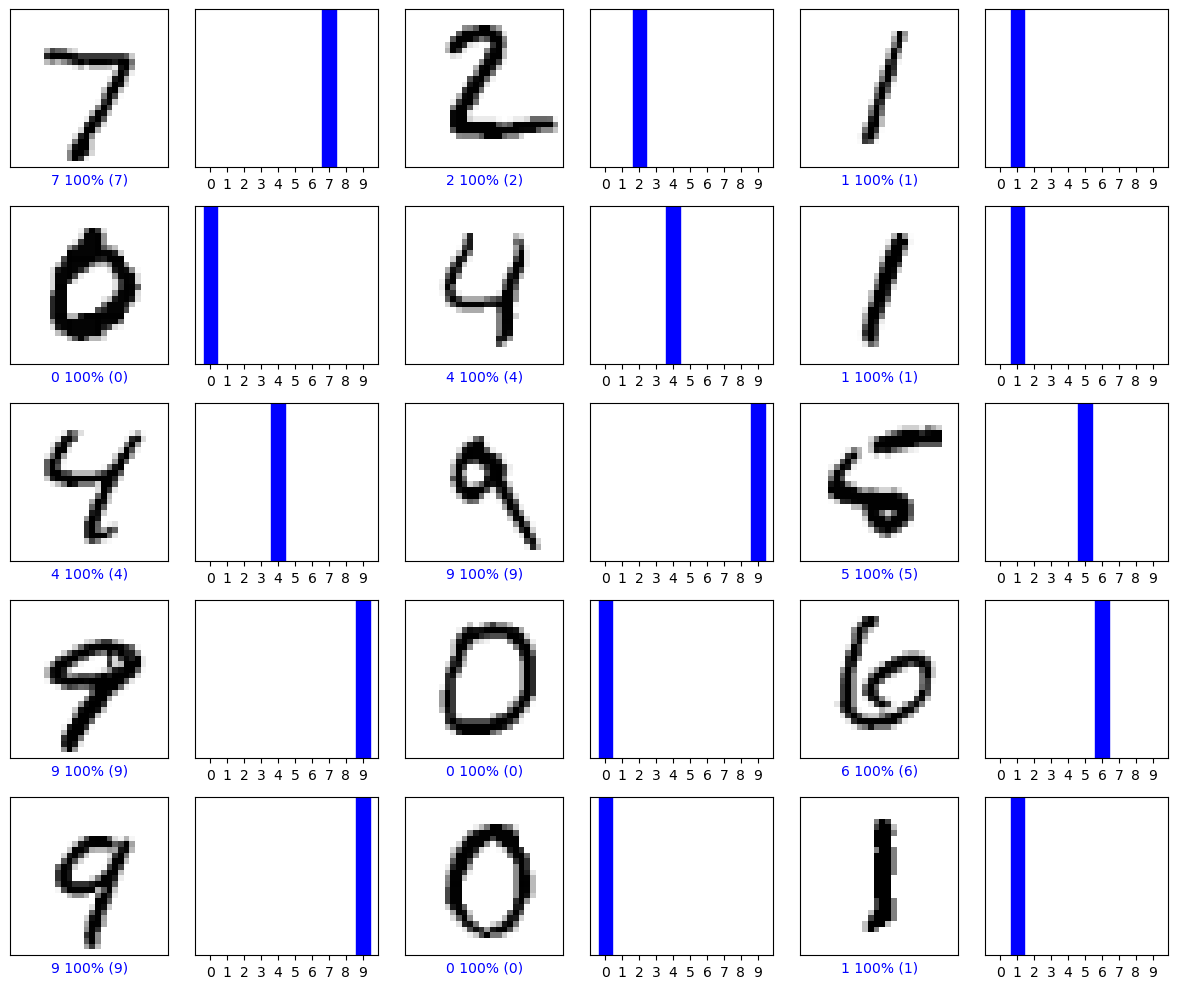

In [59]:
plot_predictions(predictions, y_test, 5, 3)

## Some misclassified samples

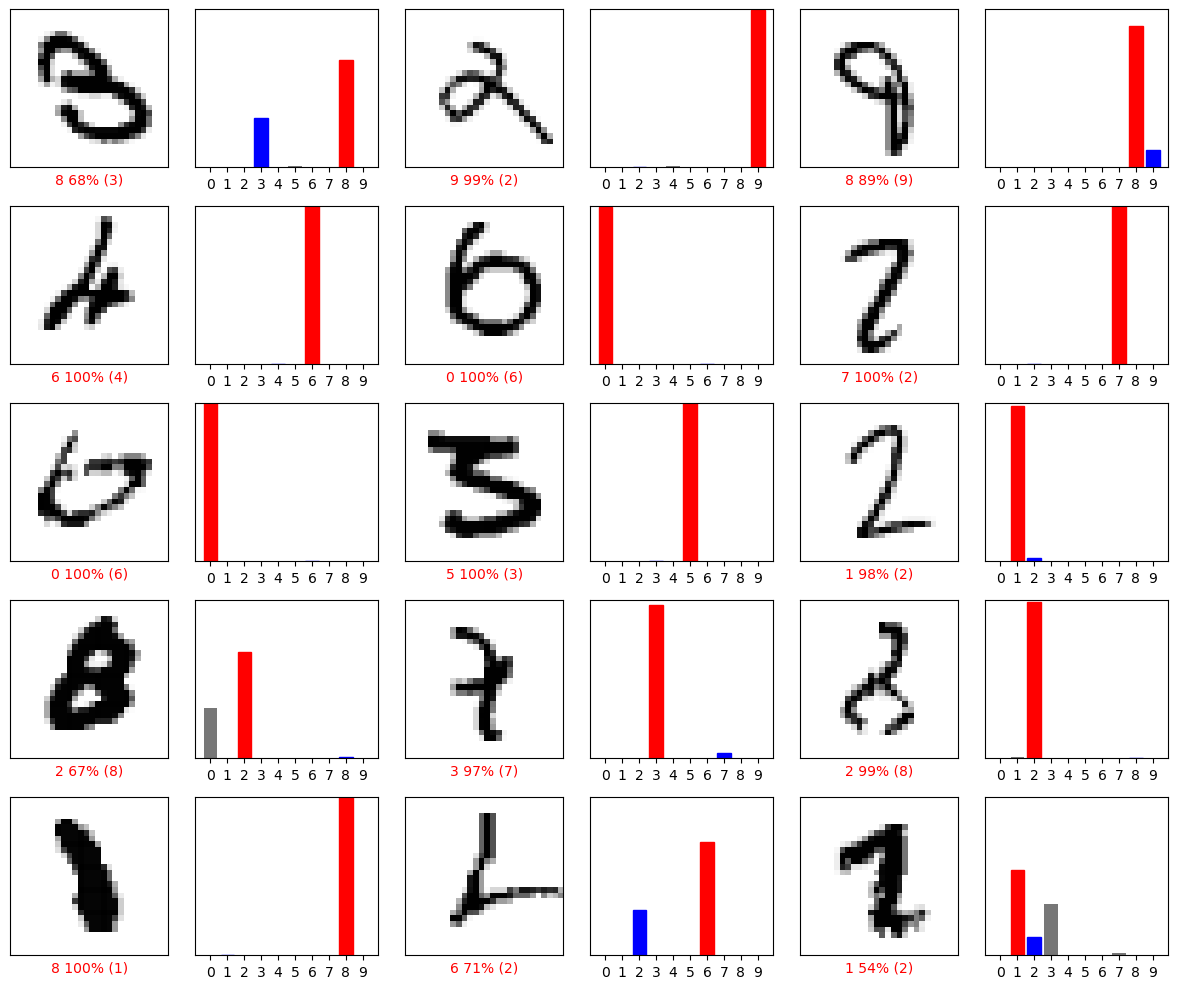

In [60]:
show_misclassified(predictions, y_test, 5, 3)

## Result comparison between the various models

The results show that the best performing model in the test set may not be the best model in the training set. This is the most relevant point here. Also, if you run this notebook multiple times, the best performing model is not necessarily the model with more trainable parameters.

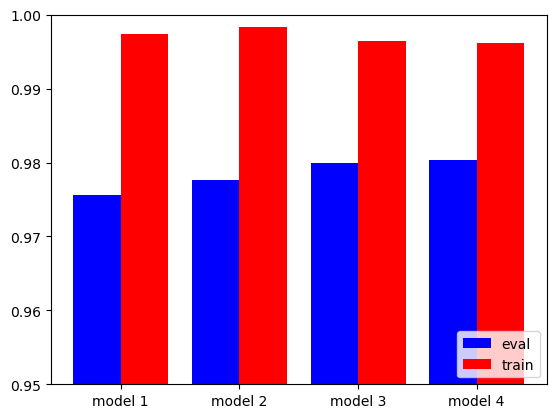

In [61]:
show_accuracies()    

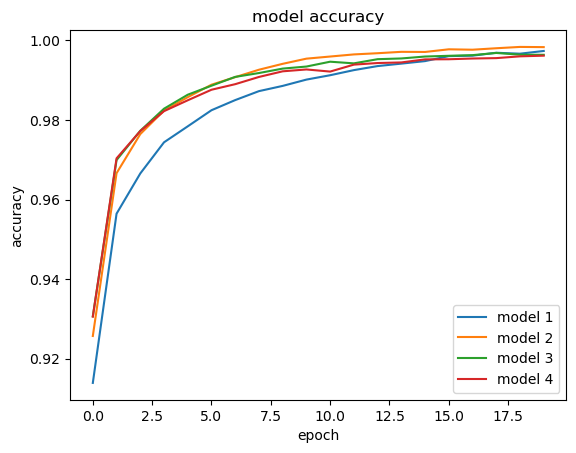

In [62]:
show_histories()